# **STATS FOR MY THESIS**

*"Lies, damned lies, and statistics"*

### DEPENDENCIES & DATA

In [88]:
# RUN THIS IF YOU USE GOOGLE COLAB TO FETCH THE LIBRARY AND REPO DATA
!pip install scikit_posthocs
!rm -rf ./content/TopSecret \
  && git clone https://github.com/HeathArhturLouis/TopSecret.git

%cd ./TopSecret/

Cloning into 'TopSecret'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 86 (delta 32), reused 58 (delta 19), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/TopSecret/TopSecret


In [89]:
%matplotlib inline

# Import packages
import numpy as np
import pandas as pd
import scipy.stats as damned_lies
import scikit_posthocs as posthocs
from matplotlib import pyplot as plt


In [90]:
#CONSTANTS

# study group id's
detection_id = 1
feedback_id = 2

# study group colors
detection_color = '#F6D55C'
feedback_color  = '#3CAEA3'

In [95]:
# Load data sets from "csv's"
friedman = pd.read_csv("data/Attempts-per-Scenario-Friedman.csv", delim_whitespace=True)
friedman_detection = pd.read_csv("data/friedman-detection-model.csv", delim_whitespace=True)
friedman_feedback = pd.read_csv("data/friedman-feedback-group.csv", delim_whitespace=True)

wilcoxon = pd.read_csv("data/Before-And-After-Correct-Answers-Wilcoxon-Signed-Rank-Test.csv", delim_whitespace=True)
students = pd.read_csv("data/Correct-Answers-Postgame-Independent-Sample-T-Test.csv", delim_whitespace=True)

### FRIEDMAN
*Non parametric test to compare individual question performance*

In [96]:
# FRIEDMAN FOR BOTH GROUPS
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman.values)[1:])

FriedmanchisquareResult(statistic=33.05735805330244, pvalue=2.583291815262756e-05)

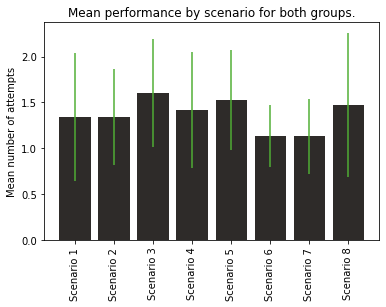

In [97]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman.values)[1:]],
    yerr=[np.std(a) for a in np.transpose(friedman.values)[1:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color='#2e2b29',
    ecolor='#50AE34')

plt.title("Mean performance by scenario for both groups.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

In [ ]:
friedman_detection

,UserId,StudyGroupId,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,Scenario6,Scenario7,Scenario8
0,44791A1C-70BC-487F-857D-09931E01239E,1,1,2,2,2,1,1,1,1
1,D3A563F1-49D5-48AC-A438-2E8DC03FA00C,1,1,2,1,1,1,2,1,2
2,86767E70-DDBB-4B8F-807B-4A9057CAEFC6,1,1,1,1,1,1,1,1,1
3,0BDC9E45-26DE-42D6-AE95-4E5E6CDBFFE8,1,1,1,2,1,1,1,1,1
4,0075A8B0-3CA3-48FC-B66D-4E645F59A044,1,1,1,1,1,1,1,1,1
5,33AFBA48-79BC-441B-A6E5-555DFDDA9EE2,1,1,1,1,1,1,1,1,3
6,E6A6D715-9FA1-4504-9425-697466ABC7C4,1,2,1,2,1,1,2,1,3
7,10E07795-6E1C-4DAA-998E-6C5055C8BCDA,1,1,1,1,1,1,1,1,1
8,B16B1E41-BDFD-4966-8B9D-7513FD114C92,1,1,1,2,1,1,1,1,3
9,42FD1FDD-5E76-4BC8-B9FF-B18ADFD20BD4,1,1,1,1,1,1,1,1,2


In [98]:
# FRIEDMAN FOR DETECTION MODEL
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman_detection.values)[2:])

FriedmanchisquareResult(statistic=19.349431818181692, pvalue=0.007160380493263334)

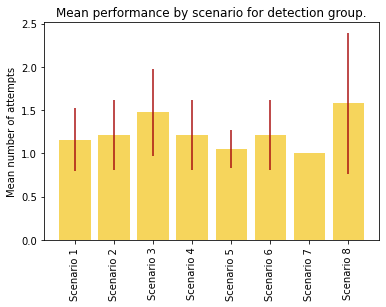

In [99]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman_detection.values)[2:]],
    yerr=[np.std(a) for a in np.transpose(friedman_detection.values)[2:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color=detection_color,
    ecolor='#AA1111')

plt.title("Mean performance by scenario for detection group.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

In [100]:
# FRIEDMAN FOR FEEDBACK GROUP
# NULL HYPOTHESIS: Median performance of problem scenarios are all the same
damned_lies.friedmanchisquare(*np.transpose(friedman_feedback.values)[2:])

FriedmanchisquareResult(statistic=42.684931506849196, pvalue=3.8369691993606476e-07)

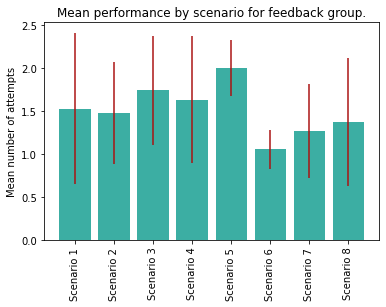

In [101]:
plt.bar(
    range(8),
    [np.mean(a) for a in np.transpose(friedman_feedback.values)[2:]],
    yerr=[np.std(a) for a in np.transpose(friedman_feedback.values)[2:]],
    tick_label=['Scenario ' + str(i + 1) for i in range(8)],
    color=feedback_color,
    ecolor='#AA1111')

plt.title("Mean performance by scenario for feedback group.")
plt.ylabel('Mean number of attempts')
plt.xticks(rotation=90)
plt.show()

**Sucessfully rejected the null hypothesis in both cases, apply**
**pairwise comparisons using Nemenyi post hoc test**

In [102]:
# DETECTION MODEL
posthocs.posthoc_nemenyi_friedman(friedman_detection.drop(['UserId', 'StudyGroupId'], axis=1))

,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,Scenario6,Scenario7,Scenario8
Scenario1,1.000000,0.9,0.768777,0.9,0.900000,0.9,0.900000,0.900000
Scenario2,0.900000,1.0,0.900000,0.9,0.900000,0.9,0.900000,0.900000
Scenario3,0.768777,0.9,1.000000,0.9,0.470039,0.9,0.301991,0.900000
Scenario4,0.900000,0.9,0.900000,1.0,0.900000,0.9,0.900000,0.900000
Scenario5,0.900000,0.9,0.470039,0.9,1.000000,0.9,0.900000,0.630197
Scenario6,0.900000,0.9,0.900000,0.9,0.900000,1.0,0.900000,0.900000
Scenario7,0.900000,0.9,0.301991,0.9,0.900000,0.9,1.000000,0.470039
Scenario8,0.900000,0.9,0.900000,0.9,0.630197,0.9,0.470039,1.000000


In [103]:
# FEEDBACK GROUP
posthocs.posthoc_nemenyi_friedman(friedman_feedback.drop(['UserId', 'StudyGroupId'], axis=1))

,Scenario1,Scenario2,Scenario3,Scenario4,Scenario5,Scenario6,Scenario7,Scenario8
Scenario1,1.000000,0.900000,0.900000,0.900000,0.118189,0.570804,0.900000,0.900000
Scenario2,0.900000,1.000000,0.900000,0.900000,0.174998,0.470039,0.900000,0.900000
Scenario3,0.900000,0.900000,1.000000,0.900000,0.788576,0.043333,0.404639,0.709385
Scenario4,0.900000,0.900000,0.900000,1.000000,0.590602,0.108545,0.610400,0.900000
Scenario5,0.118189,0.174998,0.788576,0.590602,1.000000,0.001000,0.007416,0.039221
Scenario6,0.570804,0.470039,0.043333,0.108545,0.001000,1.000000,0.900000,0.808373
Scenario7,0.900000,0.900000,0.404639,0.610400,0.007416,0.900000,1.000000,0.900000
Scenario8,0.900000,0.900000,0.709385,0.900000,0.039221,0.808373,0.900000,1.000000


### UNPAIRED T-TEST
*H_0: There is no significant difference in performance between groups 1 and 2*

In [ ]:
# Failed to reject H_0 --> We cannot conclude there is no significant difference in means of the two populations
group1 = students[students["StudyGroupId"] == detection_id]["CorrectAnswersCount"]
group2 = students[students["StudyGroupId"] == feedback_id]["CorrectAnswersCount"]

damned_lies.ttest_ind(group1, group2)

Ttest_indResult(statistic=1.3005442373195382, pvalue=0.20167873671208875)

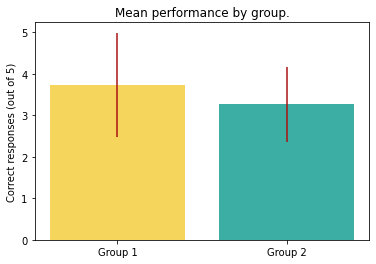

In [ ]:
plt.bar(
    [0, 1],
    [np.mean(group1), np.mean(group2)],
    color=[detection_color, feedback_color],
    yerr=[np.std(group1), np.std(group2)],
    tick_label=['Group 1','Group 2'],
    ecolor='#AA1111')

plt.title("Mean performance by group.")
plt.ylabel('Correct responses (out of 5)')
plt.show()

### WILCOXON RANK
*Determine weather game has significantly affected an individuals performance on questions*


*H_0: There is no significant different between populations*

In [ ]:
# Sucesfully rejected H_0 ---> There appears to be a significant difference between the two populations

damned_lies.wilcoxon(wilcoxon["Baseline"], wilcoxon["Postgame"])

WilcoxonResult(statistic=87.0, pvalue=0.0002624666422454448)

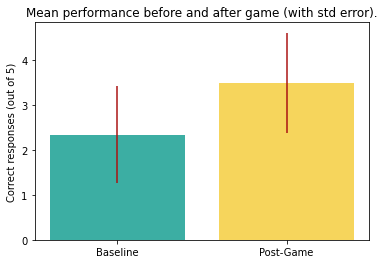

In [ ]:
plt.bar(
    [0, 1],
    [np.mean(wilcoxon["Baseline"]), np.mean(wilcoxon["Postgame"])],
    color=['#3CAEA3','#F6D55C'],
    yerr=[np.std(a) for a in [wilcoxon["Baseline"], wilcoxon["Postgame"]]],
    tick_label=['Baseline','Post-Game'],
    ecolor='#AA1111')

plt.title("Mean performance before and after game (with std error).")
plt.ylabel('Correct responses (out of 5)')
plt.show()

## PLOT HELPFULNESS

In [ ]:
helpfullness = pd.read_csv('data/data_for_graphs/helpfulness_per_group.csv', delim_whitespace=True)
helpfullness

,StudyHelpfulness,DetectionModelGroup,FeedbackGroup
0,ALittleHelpful,1,1
1,SomewhatHelpful,16,15
2,Unsure,1,1
3,VeryHelpful,1,2


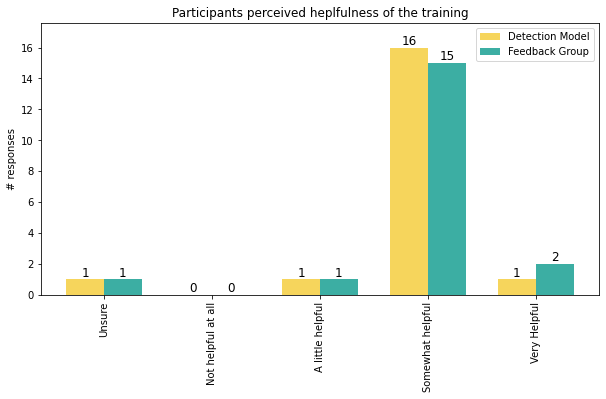

In [94]:
labels = ['Unsure', 'Not helpful at all', 'A little helpful',  'Somewhat helpful', 'Very Helpful']

detection_group = [1, 0, 1, 16, 1]
feedback_group = [1, 0, 1, 15, 2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Two bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects1 = ax.bar(x - width/2, detection_group, width, label='Detection Model', color=detection_color)
rects2 = ax.bar(x + width/2, feedback_group, width, label='Feedback Group', color=feedback_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# responses')
# TODO: Add sensible title
ax.set_title('Participants'' perceived heplfulness of the training')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)
  
plt.margins(y=0.1)
fig.set_size_inches((10,5))
plt.show()

# TRAINING

grouped bar chart: the groups are the three Avg(...) columns for general, detection, and feedback. 
    each bar is for training level (none, formal, informal, both)

In [92]:
training_per_group = pd.read_csv('data/data_for_graphs/training_per_group.csv', delim_whitespace=True)
training_per_group

,Training,AvgPerfChangeGeneral,AvgPerfChangeDMG,AvgPerfChangeFG
0,NoTraining,1.313,1.889,0.571
1,FormalOnly,1.333,2.000,0.000
2,InformalOnly,1.167,0.000,1.750
3,FormalAndInformal,0.923,1.167,0.714


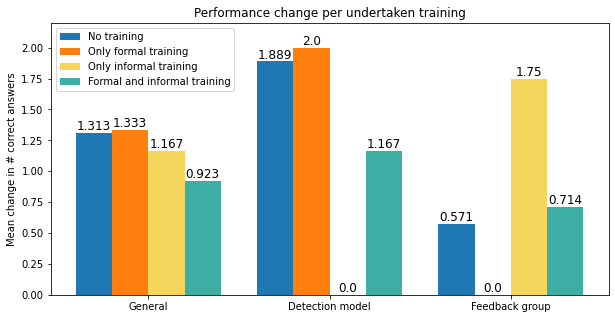

In [87]:
labels = ['General','Detection model', 'Feedback group']

none = [1.313, 1.889, 0.571]
formal = [1.333, 2.000, 0.000]
informal = [1.167, 0.000, 1.750]
formalinformal = [0.923, 1.167, 0.714]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

# Four bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects1 = ax.bar(x - 3 * width/2, none, width, label='No training')
rects2 = ax.bar(x - width/2, formal, width, label='Only formal training')
rects3 = ax.bar(x + width/2, informal, width, label='Only informal training', color=detection_color)
rects4 = ax.bar(x + 3 * width/2, formalinformal, width, label='Formal and informal training', color=feedback_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean change in # correct answers')
# ax.set_xlabel('Group')
# TODO: Add sensible title
ax.set_title('Performance change per undertaken training')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)
  
plt.margins(y=0.1)
fig.set_size_inches((10,5))
plt.show()

# PERFORMANCE

ideally something like a grouped postivie-negative bar chart, but I don't know if that's possible, so a stacked bar chart would suffice in this case (where each stack conists of up to two bars representing increase in performance and decreasein performance)
(there's only one value decreasing in performance tho)



the groups for the bars are the study groups (ALL, det model, feedback)
the bars are the factor labels (e.g secondary, bachelor, postgrad for education, the four year groups for professional experience, the six age groups)

# PERFORMANCE CHANGE AGE GROUP

In [ ]:

# HERE I DO NOT THINK IT IS NECCESARY TO INCLUDE THE ENTIRE RANGE OF AGES, SINCE ITS NOT ABOUT OPTIONS PARTICIPANTS WERE 'PICKING FROM' PER SAY
# USING ONLY TWO AGE RANGES MAKES THE GRAPH MORE READABLE WITH LESS EMPTY SPACE, FEEL FREE TO CHANGE THIS IF YOU LIKE

perf_age = pd.read_csv('data/data_for_graphs/performance_change_age_groups.csv', delim_whitespace=True)
perf_age

,AgeGroup,AvgPerfChange,AvgPerfChangeDMG,AvgPerfChangeFG
0,18-24yearsold,1.13,1.33,0.93
1,25-34yearsold,1.25,2.00,0.50


1	18 - 24 years old
2	25 - 34 years old


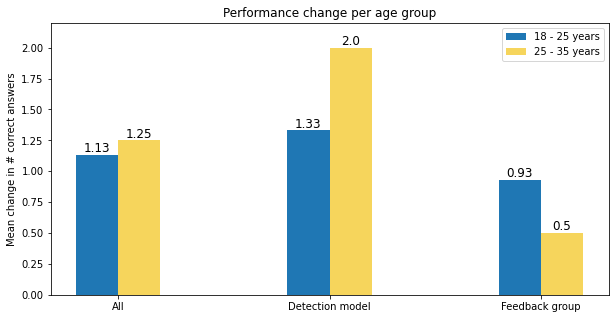

In [84]:
# Groups
labels = ['All','Detection model', 'Feedback group']

eighteen = [1.13, 1.33, 0.93]
twentyfive = [1.25, 2.00, 0.50]

x = np.arange(len(labels))  # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()

# Four bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects2 = ax.bar(x - width/2, eighteen, width, label='18 - 25 years')
rects3 = ax.bar(x + width/2, twentyfive, width, label='25 - 35 years', color=detection_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean change in # correct answers')
# ax.set_xlabel('Group')
# TODO: Add sensible title
ax.set_title('Performance change per age group')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)

plt.margins(y=0.1)
fig.set_size_inches((10,5))

plt.show()

# PERFORMANCE CHANGE EDUCATION

In [ ]:
perf_edu = pd.read_csv('data/data_for_graphs/performance_change_education.csv', delim_whitespace=True)
perf_edu

,EducationGroup,AvgPerfChange,AvgPerfChangeDMG,AvgPerfChangeFG
0,SecondaryEducation,1.27,1.67,0.93
1,BachelorDegreeOrEquivalent,1.00,1.14,0.75
2,PostgraduateMaster,0.00,0.00,0.00


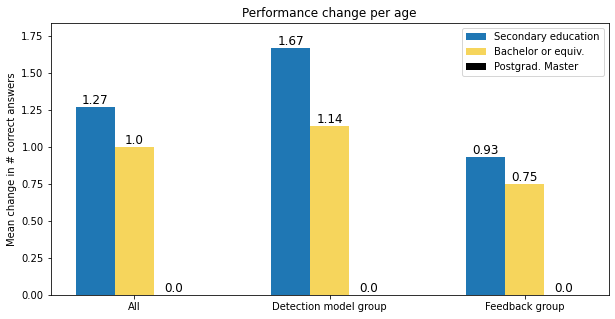

In [81]:
# Groups
labels = ['All','Detection model group', 'Feedback group']

secondary = [1.27, 1.67, 0.93]
bacherlor = [1.00, 1.14, 0.75]
postgrad  = [0.00, 0.00, 0.00]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

# Four bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects2 = ax.bar(x - width, secondary, width, label='Secondary education')
rects3 = ax.bar(x, bacherlor, width, label='Bachelor or equiv.', color=detection_color)
rects3 = ax.bar(x + width, postgrad, width, label='Postgrad. Master', color='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean change in # correct answers')
# ax.set_xlabel('Group')
ax.set_title('Performance change per age')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)

plt.margins(y=0.1)
fig.set_size_inches((10,5))

plt.show()

# PERFORMANCE CHANGE PROFESIONAL EXPERIENCE

In [ ]:
perf_exp = pd.read_csv('data/data_for_graphs/performance_change_professional_exp.csv', delim_whitespace=True)
perf_exp

,ProfessionalExperience,AvgPerfChange,AvgPerfChangeDMG,AvgPerfChangeFG
0,1yearorless,1.71,2.00,1.50
1,2-3years,1.39,1.67,1.11
2,4-5years,0.36,1.00,-0.40
3,6yearsormore,1.50,1.00,2.00


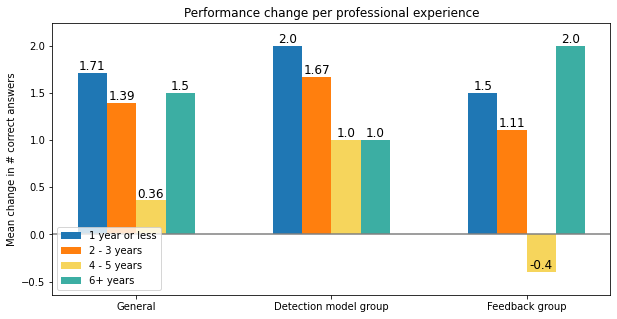

In [93]:
labels = ['General','Detection model group', 'Feedback group']

one = [1.71, 2.00, 1.5]
two = [1.39, 1.67, 1.11]
four = [0.36, 1.00, -0.40]
six = [1.5, 1.00, 2.00]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()

# Four bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects1 = ax.bar(x - 3 * width/2, one, width, label='1 year or less')
rects2 = ax.bar(x - width/2, two, width, label='2 - 3 years')
rects3 = ax.bar(x + width/2, four, width, label='4 - 5 years', color=detection_color)
rects4 = ax.bar(x + 3 * width/2, six, width, label='6+ years', color=feedback_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean change in # correct answers')
# ax.set_xlabel('Group')
ax.set_title('Performance change per professional experience')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(loc='lower left')

for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black',
          size=12)

ax.axhline(0, color='grey')

plt.margins(y=0.1)
fig.set_size_inches((10,5))

plt.show()

In [ ]:
# WE DON'T USE THE ONES BELOW ANYMORE, PUT THEM IN TABLE

## PHISHING CONFIDENCE

In [ ]:
labels = [ 'Very negatively', 'Somewhat negatively', 'No change at all', 'Somewhat positively', 'Very positively']

#### DETECTION MODEL

In [29]:
confidence_dmg = pd.read_csv('data/data_for_graphs/phishing_confidence_dmg.csv', delim_whitespace=True)
confidence_dmg

,PhishingConfidenceText,PhishingConfidenceChange,ConfidenceChangeCount
0,HighConfidence,NoChangeAtAll,3
1,HighConfidence,SomewhatPositively,4
2,HighConfidence,VeryPositively,2
3,FullConfidence,SomewhatNegatively,2
4,FullConfidence,NoChangeAtAll,4
5,FullConfidence,SomewhatPositively,2
6,FullConfidence,VeryPositively,2


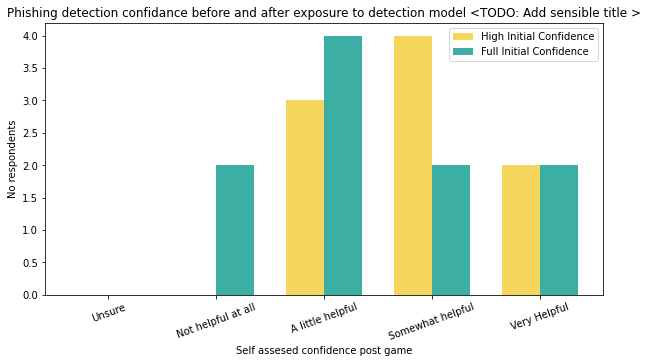

In [31]:
high_confidence = [0, 0, 3, 4, 2]
full_confidence = [0, 2, 4, 2, 2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Two bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects1 = ax.bar(x - width/2, high_confidence, width, label='High Initial Confidence', color=detection_color)
rects2 = ax.bar(x + width/2, full_confidence, width, label='Full Initial Confidence', color=feedback_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No respondents')
ax.set_xlabel('Self assesed confidence post game')
# TODO: Add sensible title
ax.set_title('Phishing detection confidance before and after exposure to detection model <TODO: Add sensible title >')
ax.set_xticks(x)
plt.xticks(rotation=20)
ax.set_xticklabels(labels)

ax.legend()

fig.set_size_inches((10,5))

plt.show()

#### FEEDBACK GROUP

In [ ]:
confidence_fg = pd.read_csv('data/data_for_graphs/phishing_confidence_fg.csv', delim_whitespace=True)
confidence_fg

,HighConfidence,SomewhatPositively,4
0,HighConfidence,VeryPositively,1
1,FullConfidence,NoChangeAtAll,4
2,FullConfidence,SomewhatPositively,6
3,FullConfidence,VeryPositively,4


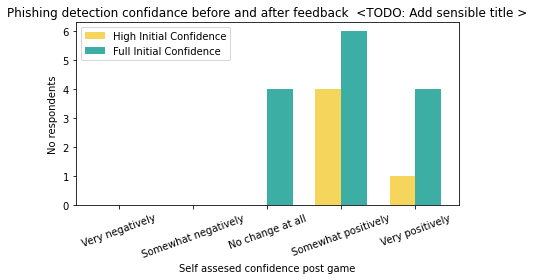

In [ ]:
high_confidence = [0, 0, 0, 4, 1]
full_confidence = [0, 0, 4, 6, 4]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Two bar boys on an axis doth a grouped bar chart make ... -- William "Wez" Shakespear
rects1 = ax.bar(x - width/2, high_confidence, width, label='High Initial Confidence', color=detection_color)
rects2 = ax.bar(x + width/2, full_confidence, width, label='Full Initial Confidence', color=feedback_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No respondents')
ax.set_xlabel('Self assesed confidence post game')
# TODO: Add sensible title
ax.set_title('Phishing detection confidance before and after feedback  <TODO: Add sensible title >')
ax.set_xticks(x)
plt.xticks(rotation=20)
ax.set_xticklabels(labels)

ax.legend()

fig.set_size_inches((10,5))

plt.show()


## SPEAR-PHISHING CONFIDENCE

In [ ]:
labels = [ 'Very negatively', 'Somewhat negatively', 'No change at all', 'Somewhat positively', 'Very positively']

#### DETECTION MODEL

In [32]:
spear_confidence_dmg = pd.read_csv('data/data_for_graphs/phishing_confidence_dmg.csv', delim_whitespace=True)
spear_confidence_dmg

,PhishingConfidenceText,PhishingConfidenceChange,ConfidenceChangeCount
0,HighConfidence,NoChangeAtAll,3
1,HighConfidence,SomewhatPositively,4
2,HighConfidence,VeryPositively,2
3,FullConfidence,SomewhatNegatively,2
4,FullConfidence,NoChangeAtAll,4
5,FullConfidence,SomewhatPositively,2
6,FullConfidence,VeryPositively,2
